Bibliotecile necesare:

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import chi2_contingency
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from IPython.display import FileLink
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

Vom incarca setul de date initial pentru a face o scurta analiza asupra acestuia.

In [ ]:
# Upload file
uploaded = files.upload()

Saving date_tema_1_iaut_2024.csv to date_tema_1_iaut_2024.csv


Dorim sa vedem informatii despre setul de date.

In [ ]:
# Read data from file
df1 = pd.read_csv('date_tema_1_iaut_2024.csv')

# Show info about the file
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Transportation                1921 non-null   object
 1   Regular_fiber_diet            1921 non-null   object
 2   Diagnostic_in_family_history  1921 non-null   object
 3   High_calorie_diet             1921 non-null   object
 4   Sedentary_hours_daily         1921 non-null   object
 5   Age                           1921 non-null   object
 6   Alcohol                       1921 non-null   object
 7   Est_avg_calorie_intake        1921 non-null   int64 
 8   Main_meals_daily              1921 non-null   object
 9   Snacks                        1921 non-null   object
 10  Height                        1921 non-null   object
 11  Smoker                        1921 non-null   object
 12  Water_daily                   1921 non-null   object
 13  Calorie_monitoring

Analiza echilibrului de clase:

Am realizat un grafic al frecvenței de apariție a fiecărei etichete (clase) în setul de date, folosind count plot.

<ipython-input-65-73ab4c6a9654>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diagnostic', data=df1, palette="Set2")


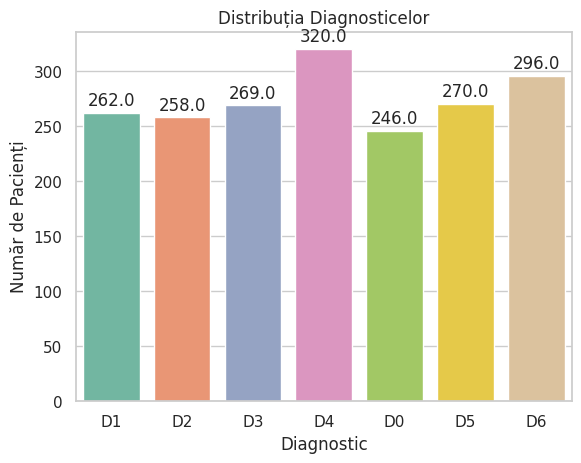

In [ ]:
# Set seaborn theme for the plots
sns.set_theme(style="whitegrid")

# Create a count plot for 'Diagnostic' categories
ax = sns.countplot(x='Diagnostic', data=df1, palette="Set2")

# Add a title and axis labels
plt.title('Distribuția Diagnosticelor')
plt.xlabel('Diagnostic')
plt.ylabel('Număr de Pacienți')

# Annotate bars with their respective counts
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

Pentru o analiza corecta asupra atributelor setului de date am decis sa elimin valorile de noise. Acestea sunt non-relevante pentru intentia noastra si produc erori nedorite.

In [28]:
# Upload file
uploaded = files.upload()

Saving cleaner_date_tema_1_iaut_2024.csv to cleaner_date_tema_1_iaut_2024 (1).csv


Dorim sa afisam diverse informatii despre noul set de date, obtinut dupa eliminarea valorilor considerate 'noise'.

In [29]:
# Read data from the file
df2 = pd.read_csv('cleaner_date_tema_1_iaut_2024.csv')

# Show info about the file
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transportation                1921 non-null   object 
 1   Regular_fiber_diet            1176 non-null   float64
 2   Diagnostic_in_family_history  1921 non-null   object 
 3   High_calorie_diet             1921 non-null   object 
 4   Sedentary_hours_daily         1920 non-null   float64
 5   Age                           669 non-null    float64
 6   Alcohol                       1921 non-null   object 
 7   Est_avg_calorie_intake        1921 non-null   int64  
 8   Main_meals_daily              1333 non-null   float64
 9   Snacks                        1921 non-null   object 
 10  Height                        1919 non-null   float64
 11  Smoker                        1921 non-null   object 
 12  Water_daily                   756 non-null    float64
 13  Cal

Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Transportation.

<ipython-input-72-03022226d866>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Transportation', data=df2, palette="Set2")


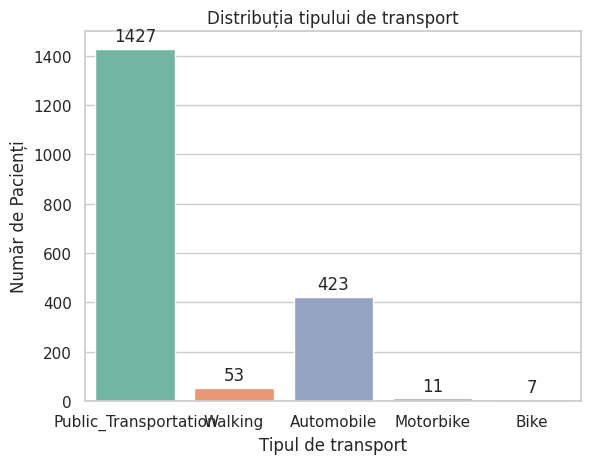

In [ ]:
# Setting up the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Creating a bar chart for the 'Transportation' category
ax = sns.countplot(x='Transportation', data=df2, palette="Set2")

# Setting the title and labels of the chart
plt.title('Distribuția tipului de transport')
plt.xlabel('Tipul de transport')
plt.ylabel('Număr de Pacienți')

# Adding annotations on each bar for the count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Displaying the chart
plt.show()

Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Regular_fiber_diet.

<ipython-input-73-aaf4f536c82b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Regular_fiber_diet', data=df2, palette="Set2")


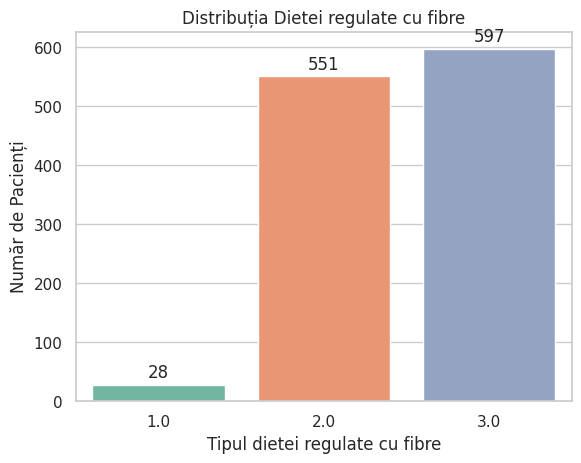

In [ ]:
# Set the overall aesthetics for seaborn plots
sns.set_theme(style="whitegrid")

# Plot the distribution of responses for 'Regular_fiber_diet'
ax = sns.countplot(x='Regular_fiber_diet', data=df2, palette="Set2")

# Label the plot with a title and axis labels
plt.title('Distribuția Dietei regulate cu fibre')
plt.xlabel('Tipul dietei regulate cu fibre')
plt.ylabel('Număr de Pacienți')

# Annotate the bar heights on the chart for clarity
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the resulting plot
plt.show()

Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Diagnostic_in_family_history.

<ipython-input-74-b816c64ff982>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diagnostic_in_family_history', data=df2, palette="Set2")


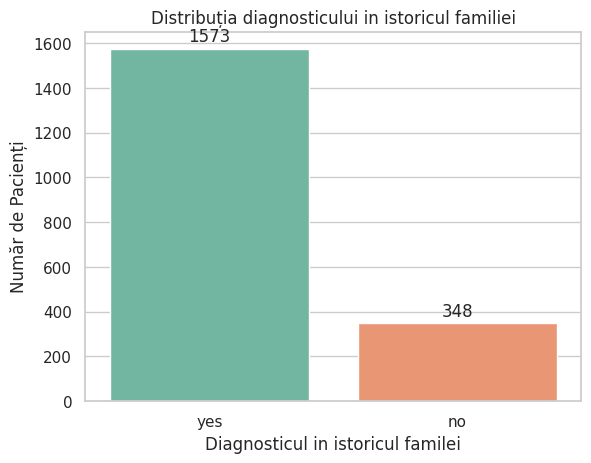

In [ ]:
# Apply a theme to the plot for a clear visual layout
sns.set_theme(style="whitegrid")

# Create a count plot for 'Diagnostic_in_family_history' responses
ax = sns.countplot(x='Diagnostic_in_family_history', data=df2, palette="Set2")

# Title and labels for the plot
plt.title('Distribuția diagnosticului in istoricul familiei')
plt.xlabel('Diagnosticul in istoricul familei')
plt.ylabel('Număr de Pacienți')

# Add data labels to each bar for visibility
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the completed plot
plt.show()

Folosim un countplot pentru a putea observa distributia valorilor pentru atributul High_calorie_diet.

<ipython-input-75-a2e2fdffabfb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='High_calorie_diet', data=df2, palette="Set2")


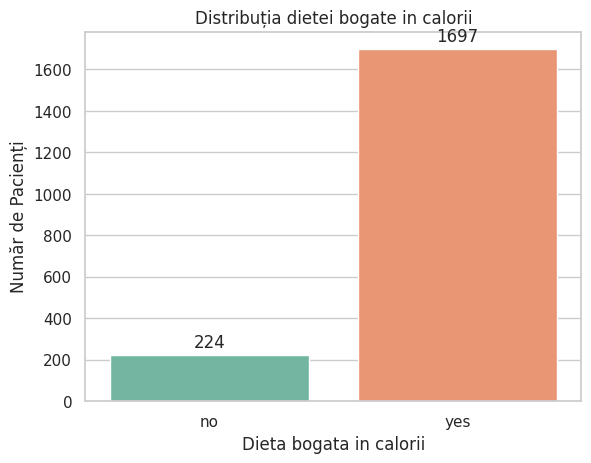

In [ ]:
# Set up the background style for the plot
sns.set_theme(style="whitegrid")

# Plot the count of 'High_calorie_diet' categories
ax = sns.countplot(x='High_calorie_diet', data=df2, palette="Set2")

# Set the plot's title and axis labels
plt.title('Distribuția dietei bogate in calorii')
plt.xlabel('Dieta bogata in calorii')
plt.ylabel('Număr de Pacienți')

# Loop through the bars and annotate the height on the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.show()

Calculam diverse valori statistice pentru atributul Sedentary_hours_daily.

Am eliminat din setul de date o valoare non relevanta: 956 de ore.

Am inlocuit aceasta valoare cu valoarea medie pentru a putea calcula Abaterea mediana absoluta.

In [ ]:
# Fill missing values in 'Sedentary_hours_daily' with the column's mean
df2['Sedentary_hours_daily'].fillna(df2['Sedentary_hours_daily'].mean(), inplace=True)

# Calculate and store the mean of 'Sedentary_hours_daily'
mean_value = df2['Sedentary_hours_daily'].mean()
# Calculate the Mean Absolute Deviation (MAD) from the mean
mad = np.mean(np.abs(df2['Sedentary_hours_daily'] - mean_value))

# Calculate and store the median of 'Sedentary_hours_daily'
median_value = df2['Sedentary_hours_daily'].median()
# Calculate the Median Absolute Deviation (MAD) from the median
median_absolute_deviation = np.median(np.abs(df2['Sedentary_hours_daily'] - median_value))

# Print out the statistical summary for 'Sedentary_hours_daily'
print("Valorile inregistrate pentru atributul Sedentary_hours_daily:")
print("Valoarea medie: ", mean_value)
print("Valoarea maximă: ", df2['Sedentary_hours_daily'].max())
print("Valoarea minimă: ", df2['Sedentary_hours_daily'].min())
print("Valoarea medianei: ", median_value)
print("Abaterea standard: ", df2['Sedentary_hours_daily'].std())
print("Abaterea medie absolută: ", mad)
print("Abaterea mediană absolută: ", median_absolute_deviation)

Valorile inregistrate pentru atributul Sedentary_hours_daily:
Valoarea medie:  3.197276041666667
Valoarea maximă:  4.67
Valoarea minimă:  2.21
Valoarea medianei:  3.13
Abaterea standard:  0.5756056835783199
Abaterea medie absolută:  0.47053131507027596
Abaterea mediană absolută:  0.43999999999999995


Calculam diverse valori statistice pentru atributul Age.

In [ ]:
# Calculate the mean age
mean_value = df2['Age'].mean()
# Calculate the Mean Absolute Deviation (MAD) from the mean
mad = np.mean(np.abs(df2['Age'] - mean_value))

# Output various statistical metrics related to the 'Age' attribute
print("Valorile inregistrate pentru atributul Age:")
print("Valoarea medie: ", mean_value)
print("Valoarea maximă: ", df2['Age'].max())
print("Valoarea minimă: ", df2['Age'].min())
print("Valoarea medianei: ", df2['Age'].median())
print("Abaterea standard: ", df2['Age'].std())
print("Abaterea medie absolută: ", mad)

Valorile inregistrate pentru atributul Age:
Valoarea medie:  23.121076233183857
Valoarea maximă:  61.0
Valoarea minimă:  15.0
Valoarea medianei:  21.0
Abaterea standard:  6.122892259253898
Abaterea medie absolută:  4.217056445936979


Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Alcohol.

<ipython-input-78-b76549d35d20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Alcohol', data=df2, palette="Set2")


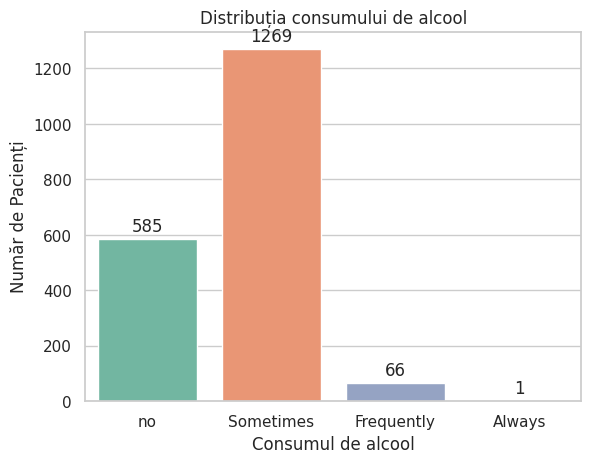

In [ ]:
# Set the visual theme for all seaborn plots
sns.set_theme(style="whitegrid")

# Create a countplot for 'Alcohol' usage in the dataset
ax = sns.countplot(x='Alcohol', data=df2, palette="Set2")

# Set the title and labels for the plot
plt.title('Distribuția consumului de alcool')
plt.xlabel('Consumul de alcool')
plt.ylabel('Număr de Pacienți')

# Annotate each bar in the countplot with its height
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

Calculam diverse valori statistice pentru atributul Est_avg_calorie_intake.

In [ ]:
# Calculate the mean of estimated average calorie intake
mean_value = df2['Est_avg_calorie_intake'].mean()
# Calculate the Mean Absolute Deviation (MAD) from the mean
mad = np.mean(np.abs(df2['Est_avg_calorie_intake'] - mean_value))

# Calculate the median of estimated average calorie intake
median_value = df2['Est_avg_calorie_intake'].median()
# Calculate the Median Absolute Deviation (MAD) from the median
median_absolute_deviation = np.median(np.abs(df2['Est_avg_calorie_intake'] - median_value))

# Calculate the first and third quartiles
Q1 = df2['Est_avg_calorie_intake'].quantile(0.25)
Q3 = df2['Est_avg_calorie_intake'].quantile(0.75)
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print summary statistics for 'Est_avg_calorie_intake'
print("Valorile inregistrate pentru atributul Est_avg_calorie_intake:")
print("Valoarea medie: ", mean_value)
print("Valoarea maximă: ", df2['Est_avg_calorie_intake'].max())
print("Valoarea minimă: ", df2['Est_avg_calorie_intake'].min())
print("Valoarea medianei: ", median_value)
print("Abaterea standard: ", df2['Est_avg_calorie_intake'].std())
print("Abaterea medie absolută: ", mad)
print("Abaterea mediană absolută: ", median_absolute_deviation)
print("Intervalul intercuartil (IQR): ", IQR)

Valorile inregistrate pentru atributul Est_avg_calorie_intake:
Valoarea medie:  2253.68766267569
Valoarea maximă:  3000
Valoarea minimă:  1500
Valoarea medianei:  2253.0
Abaterea standard:  434.07579419142866
Abaterea medie absolută:  375.36234408538627
Abaterea mediană absolută:  380.0
Intervalul intercuartil (IQR):  757.0


Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Main_meals_daily.

<ipython-input-80-ff5b39059824>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Main_meals_daily', data=df2, palette="Set2")


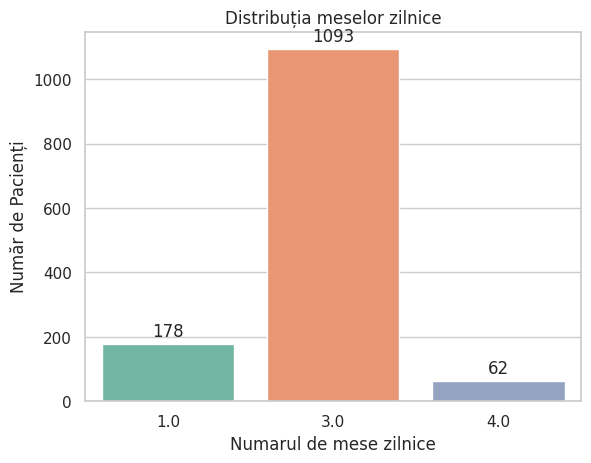

In [ ]:
# Set the plot theme to a white grid background for better readability
sns.set_theme(style="whitegrid")

# Create a count plot for 'Main_meals_daily', no need for 'hue' since it's redundant here
ax = sns.countplot(x='Main_meals_daily', data=df2, palette="Set2")

# Set plot titles and labels for clarity
plt.title('Distribuția meselor zilnice')
plt.xlabel('Numarul de mese zilnice')
plt.ylabel('Număr de Pacienți')

# Annotate each bar with the count of observations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Snacks.

<ipython-input-81-acae9f9c5f99>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Snacks', data=df2, palette="Set2")


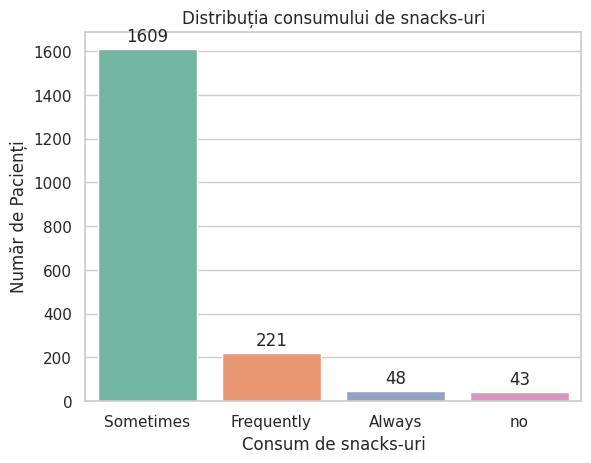

In [ ]:
# Apply a grid style to the background of the plots for clear visualization
sns.set_theme(style="whitegrid")

# Create a count plot for the 'Snacks' data to visualize consumption distribution
ax = sns.countplot(x='Snacks', data=df2, palette="Set2")

# Add a title and labels to enhance plot readability
plt.title('Distribuția consumului de snacks-uri')
plt.xlabel('Consum de snacks-uri')
plt.ylabel('Număr de Pacienți')

# Loop through each bar in the plot to annotate with the count of occurrences
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the final plot
plt.show()

Calculam diverse valori statistice pentru atributul Height.

Am eliminat doua valori care erau irelevante pentru setul de date si puteau produce erori.

Inlocuim aceste valori cu valoarea medie pentru a putea obtine statistici corecte.

In [ ]:
# Replace missing values in 'Height' with the column's mean
df2['Height'].fillna(df2['Height'].mean(), inplace=True)

# Calculate the mean of the 'Height' column
mean_value = df2['Height'].mean()
# Calculate the Mean Absolute Deviation (MAD) from the mean
mad = np.mean(np.abs(df2['Height'] - mean_value))

# Calculate the median of the 'Height' column
median_value = df2['Height'].median()
# Calculate the Median Absolute Deviation (MAD) from the median
median_absolute_deviation = np.median(np.abs(df2['Height'] - median_value))

# Determine the first and third quartiles of 'Height'
Q1 = df2['Height'].quantile(0.25)
Q3 = df2['Height'].quantile(0.75)
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print summary statistics for 'Height'
print("Valorile inregistrate pentru atributul Height:")
print("Valoarea medie: ", mean_value)
print("Valoarea maximă: ", df2['Height'].max())
print("Valoarea minimă: ", df2['Height'].min())
print("Valoarea medianei: ", median_value)
print("Abaterea standard: ", df2['Height'].std())
print("Abaterea medie absolută: ", mad)
print("Abaterea mediană absolută: ", median_absolute_deviation)
print("Intervalul intercuartil (IQR): ", IQR)

Valorile inregistrate pentru atributul Height:
Valoarea medie:  1.7022772277227722
Valoarea maximă:  1.98
Valoarea minimă:  1.45
Valoarea medianei:  1.7
Abaterea standard:  0.093206615563588
Abaterea medie absolută:  0.07702650743991632
Abaterea mediană absolută:  0.07000000000000006
Intervalul intercuartil (IQR):  0.14000000000000012


Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Smoker.

<ipython-input-83-321d91bf5802>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Smoker', data=df2, palette="Set2")


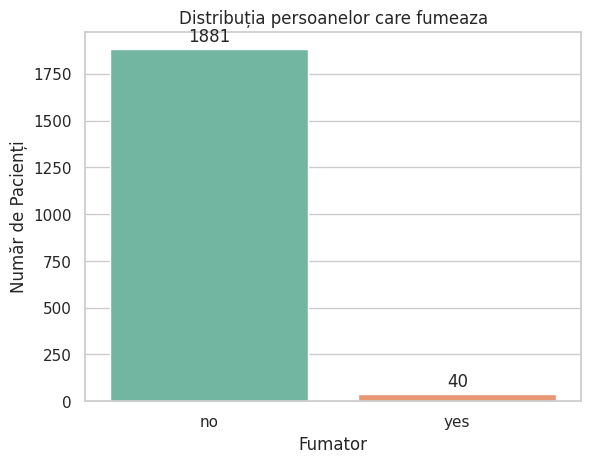

In [ ]:
# Set the style of the plot to a white grid for better readability
sns.set_theme(style="whitegrid")

# Create a count plot for the 'Smoker' attribute from the dataset
ax = sns.countplot(x='Smoker', data=df2, palette="Set2")

# Set the title and labels of the plot for clarity
plt.title('Distribuția persoanelor care fumeaza')
plt.xlabel('Fumator')
plt.ylabel('Număr de Pacienți')

# Annotate each bar with the count of observations at the top of the bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Water_daily.

<ipython-input-84-447db9e6e539>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Water_daily', data=df2, palette="Set2")


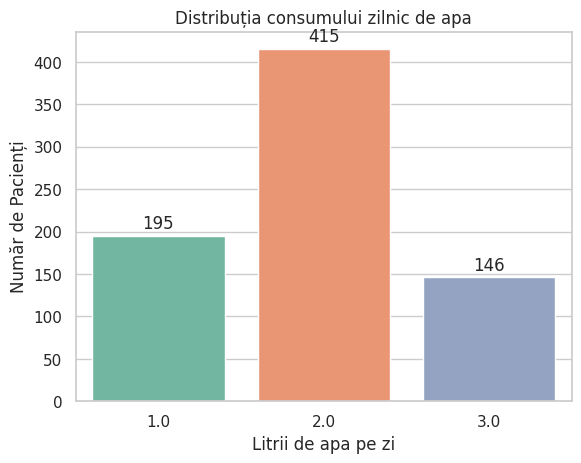

In [ ]:
# Apply a white grid theme for clearer plot aesthetics
sns.set_theme(style="whitegrid")

# Generate a count plot for daily water consumption
ax = sns.countplot(x='Water_daily', data=df2, palette="Set2")

# Title and axis labels to clarify the plot's purpose and axes
plt.title('Distribuția consumului zilnic de apa')
plt.xlabel('Litrii de apa pe zi')
plt.ylabel('Număr de Pacienți')

# Annotate each bar with the exact count of data points
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Calorie_monitoring.

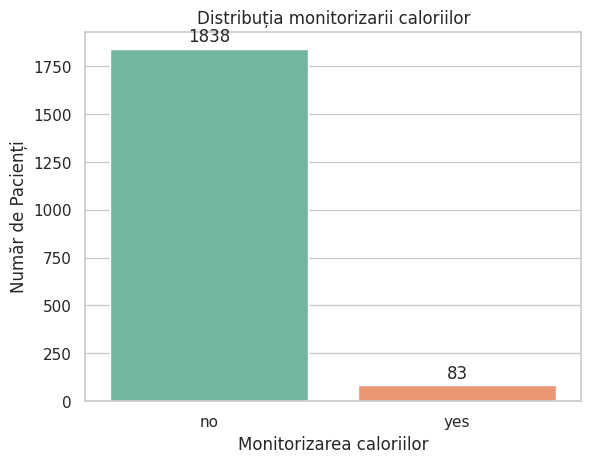

In [ ]:
# Apply a white grid theme for clearer plot aesthetics
sns.set_theme(style="whitegrid")

# Generate a count plot for daily water consumption
ax = sns.countplot(x='Calorie_monitoring', hue='Calorie_monitoring', data=df2, palette="Set2", dodge=False)

# Title and axis labels to clarify the plot's purpose and axes
plt.title('Distribuția monitorizarii caloriilor')
plt.xlabel('Monitorizarea caloriilor')
plt.ylabel('Număr de Pacienți')

# Annotate each bar with the exact count of data points
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

Calculam diverse valori statistice pentru atributul Weight.

In [ ]:
# Fill missing values in the 'Weight' column with the mean value of the column
df2['Weight'].fillna(df2['Weight'].mean(), inplace=True)

# Calculate the mean value of the 'Weight' column
mean_value = df2['Weight'].mean()
# Calculate the Mean Absolute Deviation (MAD) from the mean for the 'Weight' column
mad = np.mean(np.abs(df2['Weight'] - mean_value))

# Output various summary statistics for the 'Weight' attribute
print("Valorile inregistrate pentru atributul Weight:")
print("Valoarea medie: ", mean_value)
print("Valoarea maximă: ", df2['Weight'].max())
print("Valoarea minimă: ", df2['Weight'].min())
print("Valoarea medianei: ", df2['Weight'].median())
print("Abaterea standard: ", df2['Weight'].std())
print("Abaterea medie absolută: ", mad)

Valorile inregistrate pentru atributul Weight:
Valoarea medie:  69.32700729927005
Valoarea maximă:  130.0
Valoarea minimă:  39.0
Valoarea medianei:  69.32700729927006
Abaterea standard:  8.65248520091587
Abaterea medie absolută:  3.7281342974500156


Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Physical_activity_level.

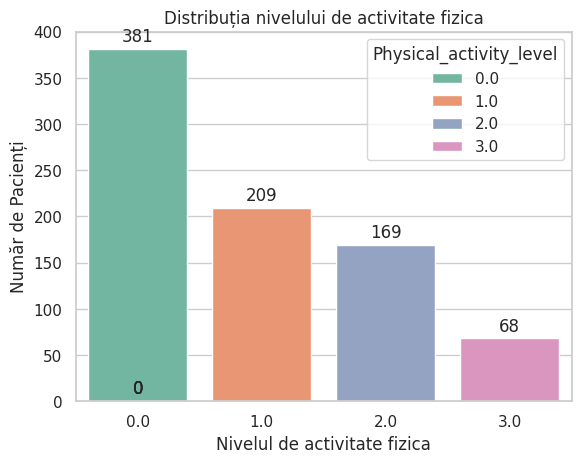

In [ ]:
# Apply a white grid theme for clearer plot aesthetics
sns.set_theme(style="whitegrid")

# Generate a count plot for daily water consumption
ax = sns.countplot(x='Physical_activity_level', hue='Physical_activity_level', data=df2, palette="Set2", dodge=False)

# Title and axis labels to clarify the plot's purpose and axes
plt.title('Distribuția nivelului de activitate fizica')
plt.xlabel('Nivelul de activitate fizica')
plt.ylabel('Număr de Pacienți')

# Annotate each bar with the exact count of data points
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Technology_time_use.

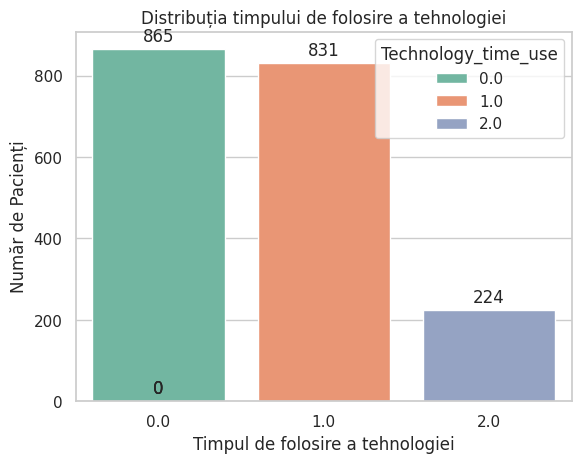

In [ ]:
# Apply a white grid theme for clearer plot aesthetics
sns.set_theme(style="whitegrid")

# Generate a count plot for daily water consumption
ax = sns.countplot(x='Technology_time_use', hue='Technology_time_use', data=df2, palette="Set2", dodge=False)

# Title and axis labels to clarify the plot's purpose and axes
plt.title('Distribuția timpului de folosire a tehnologiei')
plt.xlabel('Timpul de folosire a tehnologiei')
plt.ylabel('Număr de Pacienți')

# Annotate each bar with the exact count of data points
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

Folosim un countplot pentru a putea observa distributia valorilor pentru atributul Gender.

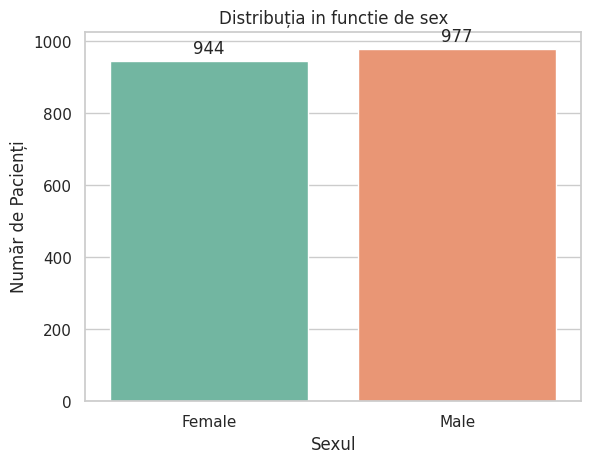

In [ ]:
# Apply a white grid theme for clearer plot aesthetics
sns.set_theme(style="whitegrid")

# Generate a count plot for daily water consumption
ax = sns.countplot(x='Gender', hue='Gender', data=df2, palette="Set2", dodge=False)

# Title and axis labels to clarify the plot's purpose and axes
plt.title('Distribuția in functie de sex')
plt.xlabel('Sexul')
plt.ylabel('Număr de Pacienți')

# Annotate each bar with the exact count of data points
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Display the plot
plt.show()

Vom realiza o analiza de covarianta intre atribute si intre atribute si clasa penrtru a observa dependentele dintre acestea.

In [11]:
# Crosstab creates a contingency table of two variables.
contingency_table = pd.crosstab(df2['Diagnostic_in_family_history'], df2['Diagnostic'])

# chi2_contingency tests for independence between the variables.
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Output the contingency table, Chi-squared statistic, and p-value.
print("Association between Diagnostic_in_family_history and Diagnostic:")
contingency_table, chi2, p_value

Association between Diagnostic_in_family_history and Diagnostic:


(Diagnostic                      0    1    2    3    4    5    6
 Diagnostic_in_family_history                                   
 0                             131  121   72   17    6    1    0
 1                             115  141  186  252  314  269  296,
 565.4862202238144,
 6.472223861927874e-119)

In [12]:
# Generates a contingency table for 'High_calorie_diet' vs 'Diagnostic'.
contingency_table = pd.crosstab(df2['High_calorie_diet'], df2['Diagnostic'])

# Performs Chi-squared test to assess the relationship.
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Prints the table and test results indicating the relationship.
print("Association between High_calorie_diet and Diagnostic:")
contingency_table, chi2, p_value

Association between High_calorie_diet and Diagnostic:


(Diagnostic           0    1    2    3    4    5    6
 High_calorie_diet                                   
 0                   46   70   20   70   10    7    1
 1                  200  192  238  199  310  263  295,
 208.2104438340789,
 3.387930453342451e-42)

In [13]:
# Create contingency table between 'Smoker' and 'Diagnostic' categories.
contingency_table = pd.crosstab(df2['Smoker'], df2['Diagnostic'])

# Calculate Chi-squared test to examine the association.
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print contingency table and Chi-squared test results.
print("Association between Smoker and Diagnostic:")
contingency_table, chi2, p_value

Association between Smoker and Diagnostic:


(Diagnostic    0    1    2    3    4    5    6
 Smoker                                       
 0           245  249  255  265  315  257  295
 1             1   13    3    4    5   13    1,
 30.310408327994224,
 3.431106582797794e-05)

In [14]:
# Build contingency table from 'Alcohol' and 'Diagnostic' data.
contingency_table = pd.crosstab(df2['Alcohol'], df2['Diagnostic'])

# Perform Chi-squared test for association between 'Alcohol' and 'Diagnostic'.
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the contingency table and the results of the Chi-squared test.
print("Association between Alcohol and Diagnostic:")
contingency_table, chi2, p_value

Association between Alcohol and Diagnostic:


(Diagnostic    0    1    2    3    4    5    6
 Alcohol                                      
 0             0    1    0    0    0    0    0
 1             1   17   15   19   12    2    0
 2           138  149  197  129  157  204  295
 3           107   95   46  121  151   64    1,
 313.74265129715997,
 7.129430759453751e-56)

In [15]:
# Contingency table for 'Physical_activity_level' against 'Diagnostic'.
contingency_table = pd.crosstab(df2['Physical_activity_level'], df2['Diagnostic'])

# Chi-squared test to see if 'Physical_activity_level' relates to 'Diagnostic'.
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Output the table and Chi-squared test findings.
print("Association between Physical_activity_level and Diagnostic:")
contingency_table, chi2, p_value

Association between Physical_activity_level and Diagnostic:


(Diagnostic                 0   1    2    3    4    5    6
 Physical_activity_level                                  
 0                         32  73   36   58   76   26   80
 1                        154  87  190  197  221  239  215
 2                         57  65   22    8   11    5    1
 3                          3  37   10    6   12    0    0,
 413.35874802193797,
 1.4934894986922793e-76)

In [16]:
# Cross-tabulation of 'Transportation' and 'Physical_activity_level'.
contingency_table = pd.crosstab(df2['Transportation'], df2['Physical_activity_level'])

# Chi-squared test for dependency between transportation means and activity level.
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Show table and test result for potential association.
print("Association between Transportation and Physical_activity_level:")
contingency_table, chi2, p_value

Association between Transportation and Physical_activity_level:


(Physical_activity_level    0     1    2   3
 Transportation                             
 0                         99   263   49  12
 1                          1     1    2   3
 2                          7     1    1   2
 3                        263  1022  103  39
 4                         11    16   14  12,
 164.21614283936736,
 7.254312927166297e-29)

Extragerea manuală a atributelor și utilizarea algoritmilor
clasici de Învățare Automată

1. Tratarea valorilor lipsă:

In [30]:
# Show informations about data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transportation                1921 non-null   object 
 1   Regular_fiber_diet            1176 non-null   float64
 2   Diagnostic_in_family_history  1921 non-null   object 
 3   High_calorie_diet             1921 non-null   object 
 4   Sedentary_hours_daily         1920 non-null   float64
 5   Age                           669 non-null    float64
 6   Alcohol                       1921 non-null   object 
 7   Est_avg_calorie_intake        1921 non-null   int64  
 8   Main_meals_daily              1333 non-null   float64
 9   Snacks                        1921 non-null   object 
 10  Height                        1919 non-null   float64
 11  Smoker                        1921 non-null   object 
 12  Water_daily                   756 non-null    float64
 13  Cal

In [31]:
# Impute missing values using the most frequent value for 'Sedentary_hours_daily'.
simple_imputer_most_frequent = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

# Impute missing values using the median for 'Height'.
simple_imputer_median = SimpleImputer(missing_values = np.nan, strategy='median')

# Imputer for filling missing values iteratively, better for more complex patterns.
iterative_imputer = IterativeImputer()

# Impute and transform 'Regular_fiber_diet', rounding to nearest int and casting to int type.
df2['Regular_fiber_diet'] = iterative_imputer.fit_transform(df2[['Regular_fiber_diet']]).round().astype(int)

# Impute 'Sedentary_hours_daily' with the most frequent value.
df2['Sedentary_hours_daily'] = simple_imputer_most_frequent.fit_transform(df2[['Sedentary_hours_daily']])

# Impute and round 'Age' to the nearest int.
df2['Age'] = iterative_imputer.fit_transform(df2[['Age']]).round().astype(int)

# Impute and round 'Main_meals_daily' to nearest int.
df2['Main_meals_daily'] = iterative_imputer.fit_transform(df2[['Main_meals_daily']]).round().astype(int)

# Impute 'Height' with the median of the column.
df2['Height'] = simple_imputer_median.fit_transform(df2[['Height']])

# Impute and round 'Water_daily' to the nearest int.
df2['Water_daily'] = iterative_imputer.fit_transform(df2[['Water_daily']]).round().astype(int)

# Impute and round 'Weight' to two decimal places.
df2['Weight'] = iterative_imputer.fit_transform(df2[['Weight']]).round(2)

# Impute and round 'Physical_activity_level' to the nearest int.
df2['Physical_activity_level'] = iterative_imputer.fit_transform(df2[['Physical_activity_level']]).round().astype(int)

# Impute 'Technology_time_use' with the most frequent value.
df2['Technology_time_use'] = simple_imputer_most_frequent.fit_transform(df2[['Technology_time_use']])

In [32]:
# Show informations about data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transportation                1921 non-null   object 
 1   Regular_fiber_diet            1921 non-null   int64  
 2   Diagnostic_in_family_history  1921 non-null   object 
 3   High_calorie_diet             1921 non-null   object 
 4   Sedentary_hours_daily         1921 non-null   float64
 5   Age                           1921 non-null   int64  
 6   Alcohol                       1921 non-null   object 
 7   Est_avg_calorie_intake        1921 non-null   int64  
 8   Main_meals_daily              1921 non-null   int64  
 9   Snacks                        1921 non-null   object 
 10  Height                        1921 non-null   float64
 11  Smoker                        1921 non-null   object 
 12  Water_daily                   1921 non-null   int64  
 13  Cal

2. Standardizarea datelor

In [33]:
# Copy data frame
df2_scaled = df2.copy()

In [34]:
# Show informations about new data frame
df2_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transportation                1921 non-null   object 
 1   Regular_fiber_diet            1921 non-null   int64  
 2   Diagnostic_in_family_history  1921 non-null   object 
 3   High_calorie_diet             1921 non-null   object 
 4   Sedentary_hours_daily         1921 non-null   float64
 5   Age                           1921 non-null   int64  
 6   Alcohol                       1921 non-null   object 
 7   Est_avg_calorie_intake        1921 non-null   int64  
 8   Main_meals_daily              1921 non-null   int64  
 9   Snacks                        1921 non-null   object 
 10  Height                        1921 non-null   float64
 11  Smoker                        1921 non-null   object 
 12  Water_daily                   1921 non-null   int64  
 13  Cal

Transormarea datelor din valori categorice in valori numerice pentru setul de date df2.

In [35]:
# Initialize the label encoder.
encoder = LabelEncoder()

# Encode categorical columns to numerical values.
df2['Transportation'] = encoder.fit_transform(df2['Transportation'])
df2['Diagnostic_in_family_history'] = encoder.fit_transform(df2['Diagnostic_in_family_history'])
df2['High_calorie_diet'] = encoder.fit_transform(df2['High_calorie_diet'])
df2['Alcohol'] = encoder.fit_transform(df2['Alcohol'])
df2['Snacks'] = encoder.fit_transform(df2['Snacks'])
df2['Smoker'] = encoder.fit_transform(df2['Smoker'])
df2['Calorie_monitoring'] = encoder.fit_transform(df2['Calorie_monitoring'])
df2['Gender'] = encoder.fit_transform(df2['Gender'])
df2['Diagnostic'] = encoder.fit_transform(df2['Diagnostic'])

In [36]:
# Show first 20 entries from data frame
df2.head(20)

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,3,2,1,0,3.73,21,3,2474,3,2,1.62,0,2,0,64.00,0,1.0,0,1
1,3,3,1,0,2.92,21,2,2429,3,2,1.52,1,3,1,56.00,3,0.0,0,1
2,3,2,1,0,3.85,23,1,2656,3,2,1.80,0,2,0,77.00,2,1.0,1,1
3,4,3,0,0,3.01,27,1,2260,3,2,1.80,0,2,0,69.33,2,0.0,1,2
4,3,2,0,0,2.73,22,2,1895,1,2,1.78,0,2,0,89.80,0,0.0,1,3
5,0,2,0,1,3.12,29,2,2308,3,2,1.62,0,2,0,69.33,0,0.0,1,1
6,2,3,1,1,3.09,23,2,2973,3,2,1.50,0,2,0,55.00,1,0.0,0,1
7,3,3,1,1,3.53,24,1,2720,3,2,1.78,0,2,0,69.33,1,1.0,1,1
8,3,2,1,1,3.04,22,3,2784,3,2,1.72,0,2,0,68.00,1,1.0,1,1
9,3,3,1,1,4.47,26,2,1922,3,1,1.85,0,3,0,69.33,2,2.0,1,4


Transormarea datelor din valori categorice in valori numerice și standardizarea pentru setul de date df2_scaled.

In [37]:
# Initialize label encoder to convert categorical columns to numerical values.
encoder = LabelEncoder()

# Encode categorical variables in the 'df2_scaled' DataFrame.
df2_scaled['Transportation'] = encoder.fit_transform(df2['Transportation'])
df2_scaled['Diagnostic_in_family_history'] = encoder.fit_transform(df2['Diagnostic_in_family_history'])
df2_scaled['High_calorie_diet'] = encoder.fit_transform(df2['High_calorie_diet'])
df2_scaled['Alcohol'] = encoder.fit_transform(df2['Alcohol'])
df2_scaled['Snacks'] = encoder.fit_transform(df2['Snacks'])
df2_scaled['Smoker'] = encoder.fit_transform(df2['Smoker'])
df2_scaled['Calorie_monitoring'] = encoder.fit_transform(df2['Calorie_monitoring'])
df2_scaled['Gender'] = encoder.fit_transform(df2['Gender'])
df2_scaled['Diagnostic'] = encoder.fit_transform(df2['Diagnostic'])

# Initialize scaler, choose one based on data distribution and scaling needs.
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MinMaxScaler()

# Scale numerical variables.
df2_scaled['Sedentary_hours_daily'] = scaler.fit_transform(df2_scaled[['Sedentary_hours_daily']])
df2_scaled['Age'] = scaler.fit_transform(df2_scaled[['Age']])
df2_scaled['Est_avg_calorie_intake'] = scaler.fit_transform(df2_scaled[['Est_avg_calorie_intake']])
df2_scaled['Height'] = scaler.fit_transform(df2_scaled[['Height']])
df2_scaled['Weight'] = scaler.fit_transform(df2_scaled[['Weight']])

In [38]:
# Show first 20 entries from the scaled data frame
df2_scaled.head(20)

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
0,3,2,1,0,0.925831,-0.565528,3,0.507676,3,2,-0.882944,0,2,0,-0.616070,0,1.0,0,1
1,3,3,1,0,-0.481736,-0.565528,2,0.403980,3,2,-1.956109,1,3,1,-1.540900,3,0.0,0,1
2,3,2,1,0,1.134360,-0.011677,1,0.927066,3,2,1.048751,0,2,0,0.886780,2,1.0,1,1
3,4,3,0,0,-0.325339,1.096026,1,0.014546,3,2,1.048751,0,2,0,0.000099,2,0.0,1,2
4,3,2,0,0,-0.811906,-0.288603,2,-0.826540,1,2,0.834118,0,2,0,2.366509,0,0.0,1,3
5,0,2,0,1,-0.134188,1.649878,2,0.125154,3,2,-0.882944,0,2,0,0.000099,0,0.0,1,1
6,2,3,1,1,-0.186321,-0.011677,2,1.657544,3,2,-2.170741,0,2,0,-1.656504,1,0.0,0,1
7,3,3,1,1,0.578284,0.265249,1,1.074544,3,2,0.834118,0,2,0,0.000099,1,1.0,1,1
8,3,2,1,1,-0.273207,-0.288603,3,1.222023,3,2,0.190220,0,2,0,-0.153654,1,1.0,1,1
9,3,3,1,1,2.211757,0.819101,2,-0.764323,3,1,1.585333,0,3,0,0.000099,2,2.0,1,4


3. Feature Extraction

In [39]:
# Define lists of categorical and numeric feature names.
categorical_features = ['Transportation', 'Regular_fiber_diet', 'Diagnostic_in_family_history', 'High_calorie_diet', 'Alcohol', 'Main_meals_daily', 'Snacks', 'Smoker', 'Water_daily', 'Calorie_monitoring', 'Physical_activity_level', 'Technology_time_use', 'Gender']
numeric_features = ['Sedentary_hours_daily', 'Age', 'Est_avg_calorie_intake', 'Height', 'Weight']

# Separate the original dataframe into categorical and numeric dataframes.
df2_categorical = df2[categorical_features]
df2_numeric = df2[numeric_features]

# Separate the scaled dataframe into categorical and numeric dataframes.
df2_scaled_categorical = df2_scaled[categorical_features]
df2_scaled_numeric = df2_scaled[numeric_features]

# Define the target variable from both original and scaled datasets.
target = df2['Diagnostic']
target_scaled = df2_scaled['Diagnostic']

# Initialize the SelectKBest method for chi-squared, to select 11 best features from categorical data.
chi2_selector = SelectKBest(chi2, k=11)
# Initialize the SelectKBest method for ANOVA F-test, to select 4 best features from numeric data.
f_classif_selector = SelectKBest(f_classif, k=4)

# Apply chi-squared selection to the categorical data.
df2_categorical_selected = chi2_selector.fit_transform(df2_categorical, target)
# Apply F-test selection to the numeric data.
df2_numeric_selected = f_classif_selector.fit_transform(df2_numeric, target)

# Apply chi-squared selection to the scaled categorical data.
df2_scaled_categorical_selected = chi2_selector.fit_transform(df2_scaled_categorical, target_scaled)
# Apply F-test selection to the scaled numeric data.
df2_scaled_numeric_selected = f_classif_selector.fit_transform(df2_scaled_numeric, target_scaled)

In [40]:
# Retrieve the names of selected categorical features based on the chi-squared test.
selected_categorical_features = df2_categorical.columns[chi2_selector.get_support()]
# Retrieve the names of selected numeric features based on the ANOVA F-test.
selected_numeric_features = df2_numeric.columns[f_classif_selector.get_support()]

# Create new DataFrames for the selected categorical and numeric features from the original dataset.
df2_categorical_selected_df = pd.DataFrame(df2_categorical_selected, columns=selected_categorical_features)
df2_numeric_selected_df = pd.DataFrame(df2_numeric_selected, columns=selected_numeric_features)

# Retrieve the names of selected categorical features from the scaled data.
selected_scaled_categorical_features = df2_scaled_categorical.columns[chi2_selector.get_support()]
# Retrieve the names of selected numeric features from the scaled data.
selected_scaled_numeric_features = df2_scaled_numeric.columns[f_classif_selector.get_support()]

# Create new DataFrames for the selected categorical and numeric features from the scaled dataset.
df2_scaled_categorical_selected_df = pd.DataFrame(df2_scaled_categorical_selected, columns=selected_scaled_categorical_features)
df2_scaled_numeric_selected_df = pd.DataFrame(df2_scaled_numeric_selected, columns=selected_scaled_numeric_features)

# Concatenate the selected categorical and numeric features along with the target variable to form a complete dataset.
df2_selected_features = pd.concat([df2_categorical_selected_df, df2_numeric_selected_df, df2['Diagnostic']], axis=1)

# Concatenate the selected scaled categorical and numeric features along with the target variable for the scaled dataset.
df2_scaled_selected_features = pd.concat([df2_scaled_categorical_selected_df, df2_scaled_numeric_selected_df, df2['Diagnostic']], axis=1)

In [42]:
# Extract Chi-squared scores from the fitted SelectKBest object.
chi2_scores = chi2_selector.scores_
# Sort indices of Chi-squared scores in descending order for prioritization.
chi2_sorted_indices = np.argsort(chi2_scores)[::-1]
# Retrieve the sorted Chi-squared scores using the sorted indices.
sorted_chi2_scores = chi2_scores[chi2_sorted_indices]
# Match the sorted scores with their corresponding feature names.
sorted_categorical_features = df2_categorical.columns[chi2_sorted_indices]

# Print the sorted categorical features alongside their Chi-squared scores.
print("Categorical attributes sorted by chi2 score:")
print(pd.DataFrame(sorted_chi2_scores, index=sorted_categorical_features, columns=['chi2_score']))

# Extract F-classif scores from the fitted SelectKBest object.
f_classif_scores = f_classif_selector.scores_
# Sort indices of F-classif scores in descending order.
f_classif_sorted_indices = np.argsort(f_classif_scores)[::-1]
# Retrieve the sorted F-classif scores using the sorted indices.
sorted_f_classif_scores = f_classif_scores[f_classif_sorted_indices]
# Match the sorted scores with their corresponding feature names.
sorted_numeric_features = df2_numeric.columns[f_classif_sorted_indices]

# Print the sorted numeric features alongside their ANOVA F-test scores.
print("Numeric attributes sorted by ANOVA F-test score:")
print(pd.DataFrame(sorted_f_classif_scores, index=sorted_numeric_features, columns=['f_classif_score']))

Categorical attributes sorted by chi2 score:
                              chi2_score
Gender                        292.146301
Calorie_monitoring            106.226250
Diagnostic_in_family_history  102.441023
Transportation                 97.847689
Regular_fiber_diet             83.427195
Physical_activity_level        53.105158
Snacks                         40.836828
Smoker                         29.679270
Technology_time_use            29.231594
High_calorie_diet              24.278573
Alcohol                        20.095790
Main_meals_daily                9.241580
Water_daily                     6.047906
Numeric attributes sorted by ANOVA F-test score:
                        f_classif_score
Weight                        82.858446
Height                        34.050162
Age                           14.159415
Sedentary_hours_daily          6.370526
Est_avg_calorie_intake         1.938191


In [ ]:
# Show informations and first 20 entries from new feature selected data frame
df2_selected_features.info()
df2_selected_features.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transportation                1921 non-null   float64
 1   Regular_fiber_diet            1921 non-null   float64
 2   Diagnostic_in_family_history  1921 non-null   float64
 3   High_calorie_diet             1921 non-null   float64
 4   Alcohol                       1921 non-null   float64
 5   Snacks                        1921 non-null   float64
 6   Smoker                        1921 non-null   float64
 7   Calorie_monitoring            1921 non-null   float64
 8   Physical_activity_level       1921 non-null   float64
 9   Technology_time_use           1921 non-null   float64
 10  Gender                        1921 non-null   float64
 11  Sedentary_hours_daily         1921 non-null   float64
 12  Age                           1921 non-null   float64
 13  Hei

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Alcohol,Snacks,Smoker,Calorie_monitoring,Physical_activity_level,Technology_time_use,Gender,Sedentary_hours_daily,Age,Height,Weight,Diagnostic
0,3.0,2.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,3.73,21.0,1.62,64.00,1
1,3.0,3.0,1.0,0.0,2.0,2.0,1.0,1.0,3.0,0.0,0.0,2.92,21.0,1.52,56.00,1
2,3.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,3.85,23.0,1.80,77.00,1
3,4.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,3.01,27.0,1.80,69.33,2
4,3.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.73,22.0,1.78,89.80,3
5,0.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,3.12,29.0,1.62,69.33,1
6,2.0,3.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,3.09,23.0,1.50,55.00,1
7,3.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,3.53,24.0,1.78,69.33,1
8,3.0,2.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0,1.0,1.0,3.04,22.0,1.72,68.00,1
9,3.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,1.0,4.47,26.0,1.85,69.33,4


In [43]:
# Show informations and first 20 entries from new feature selected scaled data frame
df2_scaled_selected_features.info()
df2_scaled_selected_features.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transportation                1921 non-null   float64
 1   Regular_fiber_diet            1921 non-null   float64
 2   Diagnostic_in_family_history  1921 non-null   float64
 3   High_calorie_diet             1921 non-null   float64
 4   Alcohol                       1921 non-null   float64
 5   Snacks                        1921 non-null   float64
 6   Smoker                        1921 non-null   float64
 7   Calorie_monitoring            1921 non-null   float64
 8   Physical_activity_level       1921 non-null   float64
 9   Technology_time_use           1921 non-null   float64
 10  Gender                        1921 non-null   float64
 11  Sedentary_hours_daily         1921 non-null   float64
 12  Age                           1921 non-null   float64
 13  Hei

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Alcohol,Snacks,Smoker,Calorie_monitoring,Physical_activity_level,Technology_time_use,Gender,Sedentary_hours_daily,Age,Height,Weight,Diagnostic
0,3.0,2.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.925831,-0.565528,-0.882944,-0.616070,1
1,3.0,3.0,1.0,0.0,2.0,2.0,1.0,1.0,3.0,0.0,0.0,-0.481736,-0.565528,-1.956109,-1.540900,1
2,3.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,1.0,1.134360,-0.011677,1.048751,0.886780,1
3,4.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,-0.325339,1.096026,1.048751,0.000099,2
4,3.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,-0.811906,-0.288603,0.834118,2.366509,3
5,0.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,-0.134188,1.649878,-0.882944,0.000099,1
6,2.0,3.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,-0.186321,-0.011677,-2.170741,-1.656504,1
7,3.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.578284,0.265249,0.834118,0.000099,1
8,3.0,2.0,1.0,1.0,3.0,2.0,0.0,0.0,1.0,1.0,1.0,-0.273207,-0.288603,0.190220,-0.153654,1
9,3.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,1.0,2.211757,0.819101,1.585333,0.000099,4


4. Gasirea hiper-parametrilor

RandomForest:

In [ ]:
# Drop the target variable and retain the predictors.
X = df2_selected_features.drop('Diagnostic', axis=1)
# Extract the target variable 'Diagnostic'.
Y = df2_selected_features['Diagnostic']

# Split data into training and testing sets with 20% test size and fixed random state for reproducibility.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define a dictionary for grid search parameters for the Random Forest.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'max_features': [0.25, 'sqrt', 'log2']
}

# Initialize the Random Forest classifier.
rfc = RandomForestClassifier()

# Setup GridSearchCV with Random Forest, using accuracy for scoring and running parallel jobs.
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data.
cv_rfc.fit(X_train, Y_train)

# Print the best hyperparameters found during the grid search.
print("Best parameters found: ", cv_rfc.best_params_)

# Print the highest accuracy achieved with the best hyperparameters.
print("Best score: ", cv_rfc.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
Best score:  0.7324315749397182


In [ ]:
# Define predictors and the target variable from the selected features dataset.
X = df2_selected_features.drop('Diagnostic', axis=1)
Y = df2_selected_features['Diagnostic']

# Split the dataset into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Set optimal hyperparameters for the Random Forest Classifier.
optimal_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'max_features': 'log2'
}

# Initialize and train the Random Forest model with the optimal parameters.
model = RandomForestClassifier(**optimal_params)
model.fit(X_train, Y_train)

# Predict the target variable for the test set.
Y_pred = model.predict(X_test)

# Compute the confusion matrix.
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Calculate per-class accuracy from the confusion matrix.
accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Calculate the mean and variance of per-class accuracy.
mean_accuracy = np.mean(accuracies)
variance_accuracy = np.var(accuracies)

# Compute precision, recall, and F1-score for each class.
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, Y_pred, average=None)

# Calculate mean and variance of precision, recall, and F1-score.
mean_precision = np.mean(precision)
variance_precision = np.var(precision)
mean_recall = np.mean(recall)
variance_recall = np.var(recall)
mean_fscore = np.mean(fscore)
variance_fscore = np.var(fscore)

# Print per-class accuracy.
for idx, acc in enumerate(accuracies):
    print(f"Acuratețea clasei {idx}: {acc:.2f}")

# Display precision, recall, and F1-score for each class.
print("Precision per class: ", precision)
print("Recall per class: ", recall)
print("F1-Score per class: ", fscore)

# Print overall mean and variance of accuracy, precision, recall, and F1-score.
print(f"Media acurateței: {mean_accuracy:.2f}, Varianța acurateței: {variance_accuracy:.2f}")
print(f"Media preciziei: {mean_precision:.2f}, Varianța preciziei: {variance_precision:.2f}")
print(f"Media recall-ului: {mean_recall:.2f}, Varianța recall-ului: {variance_recall:.2f}")
print(f"Media F1-score: {mean_fscore:.2f}, Varianța F1-score: {variance_fscore:.2f}")

# Output the confusion matrix.
print("Matricea de confuzie:\n", conf_matrix)

Acuratețea clasei 0: 0.77
Acuratețea clasei 1: 0.90
Acuratețea clasei 2: 0.43
Acuratețea clasei 3: 0.61
Acuratețea clasei 4: 0.61
Acuratețea clasei 5: 0.90
Acuratețea clasei 6: 0.98
Precision per class:  [0.90196078 0.70149254 0.72       0.69767442 0.84       0.58695652
 0.9122807 ]
Recall per class:  [0.76666667 0.90384615 0.42857143 0.6122449  0.60869565 0.9
 0.98113208]
F1-Score per class:  [0.82882883 0.78991597 0.53731343 0.65217391 0.70588235 0.71052632
 0.94545455]
Media acurateței: 0.74, Varianța acurateței: 0.03
Media preciziei: 0.77, Varianța preciziei: 0.01
Media recall-ului: 0.74, Varianța recall-ului: 0.03
Media F1-score: 0.74, Varianța F1-score: 0.01
Matricea de confuzie:
 [[46  9  1  1  0  1  2]
 [ 1 47  1  2  0  1  0]
 [ 2  6 18  1  6  8  1]
 [ 0  3  3 30  2 11  0]
 [ 0  1  2  5 42 17  2]
 [ 2  1  0  3  0 54  0]
 [ 0  0  0  1  0  0 52]]


In [ ]:
# Retrieve the feature importances from the trained Random Forest model.
feature_importances = model.feature_importances_

# Get the names of the features from the training dataset.
attributes = X_train.columns

# Sort the indices of the feature importances in descending order.
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the feature importances in descending order.
print("Importanța caracteristicilor:")
for idx in sorted_indices:
    print(f"{attributes[idx]}: {feature_importances[idx]:.4f}")

Importanța caracteristicilor:
Weight: 0.1372
Height: 0.1258
Regular_fiber_diet: 0.1176
Age: 0.0857
Gender: 0.0838
Alcohol: 0.0746
Sedentary_hours_daily: 0.0691
Snacks: 0.0620
Diagnostic_in_family_history: 0.0569
Transportation: 0.0557
Physical_activity_level: 0.0478
Technology_time_use: 0.0332
High_calorie_diet: 0.0331
Calorie_monitoring: 0.0115
Smoker: 0.0060


ExtraTrees:

In [ ]:
# Split data into features (X) and target (Y).
X = df2_selected_features.drop('Diagnostic', axis=1)
Y = df2_selected_features['Diagnostic']

# Partition data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define hyperparameter search space.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'max_features': [0.25, 'sqrt', 'log2']
}

# Initialize the Extra Trees Classifier.
etc = ExtraTreesClassifier()

# Configure grid search with cross-validation.
cv_etc = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV to training data.
cv_etc.fit(X_train, Y_train)

# Display best hyperparameters.
print("Best parameters found: ", cv_etc.best_params_)

# Display best score achieved.
print("Best score: ", cv_etc.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': 20, 'max_features': 0.25, 'n_estimators': 300}
Best score:  0.7239688650112102


In [ ]:
# Drop target column to isolate features and define target variable.
X = df2_selected_features.drop('Diagnostic', axis=1)
Y = df2_selected_features['Diagnostic']

# Split data into training and testing sets with a 20% test size.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Set optimal model parameters.
optimal_params = {
    'n_estimators': 300,
    'max_depth': 20,
    'max_features': 0.25
}

# Initialize and fit the Extra Trees Classifier with optimal parameters.
model = ExtraTreesClassifier(**optimal_params)
model.fit(X_train, Y_train)

# Predict the target values for the test set.
Y_pred = model.predict(X_test)

# Generate the confusion matrix from test results.
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Calculate class-specific accuracies.
accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Compute mean and variance of class-specific accuracies.
mean_accuracy = np.mean(accuracies)
variance_accuracy = np.var(accuracies)

# Calculate precision, recall, and F1-score for each class.
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, Y_pred, average=None)

# Calculate mean and variance of precision, recall, and F1-score.
mean_precision = np.mean(precision)
variance_precision = np.var(precision)
mean_recall = np.mean(recall)
variance_recall = np.var(recall)
mean_fscore = np.mean(fscore)
variance_fscore = np.var(fscore)

# Print class-specific accuracies.
for idx, acc in enumerate(accuracies):
    print(f"Acuratețea clasei {idx}: {acc:.2f}")

# Print precision, recall, and F1-score for each class.
print("Precision per class: ", precision)
print("Recall per class: ", recall)
print("F1-Score per class: ", fscore)

# Print overall mean and variance of accuracy, precision, recall, and F1-score.
print(f"Media acurateței: {mean_accuracy:.2f}, Varianța acurateței: {variance_accuracy:.2f}")
print(f"Media preciziei: {mean_precision:.2f}, Varianța preciziei: {variance_precision:.2f}")
print(f"Media recall-ului: {mean_recall:.2f}, Varianța recall-ului: {variance_recall:.2f}")
print(f"Media F1-score: {mean_fscore:.2f}, Varianța F1-score: {variance_fscore:.2f}")

# Output the confusion matrix.
print("Matricea de confuzie:\n", conf_matrix)

Acuratețea clasei 0: 0.75
Acuratețea clasei 1: 0.77
Acuratețea clasei 2: 0.60
Acuratețea clasei 3: 0.69
Acuratețea clasei 4: 0.70
Acuratețea clasei 5: 0.85
Acuratețea clasei 6: 0.98
Precision per class:  [0.9        0.6557377  0.71428571 0.69387755 0.85714286 0.64556962
 0.94545455]
Recall per class:  [0.75       0.76923077 0.5952381  0.69387755 0.69565217 0.85
 0.98113208]
F1-Score per class:  [0.81818182 0.7079646  0.64935065 0.69387755 0.768      0.73381295
 0.96296296]
Media acurateței: 0.76, Varianța acurateței: 0.01
Media preciziei: 0.77, Varianța preciziei: 0.01
Media recall-ului: 0.76, Varianța recall-ului: 0.01
Media F1-score: 0.76, Varianța F1-score: 0.01
Matricea de confuzie:
 [[45 10  3  1  0  1  0]
 [ 4 40  2  4  1  0  1]
 [ 1  6 25  0  3  7  0]
 [ 0  2  3 34  2  8  0]
 [ 0  2  2  3 48 12  2]
 [ 0  1  0  6  2 51  0]
 [ 0  0  0  1  0  0 52]]


In [ ]:
# Retrieve the feature importances from the trained model.
feature_importances = model.feature_importances_

# Get the feature names from the training dataset.
attributes = X_train.columns

# Sort the indices of the feature importances in descending order.
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the sorted feature importances.
print("Importanța caracteristicilor:")
for idx in sorted_indices:
    print(f"{attributes[idx]}: {feature_importances[idx]:.4f}")

Importanța caracteristicilor:
Weight: 0.1443
Height: 0.1306
Regular_fiber_diet: 0.1231
Age: 0.0819
Gender: 0.0780
Alcohol: 0.0703
Sedentary_hours_daily: 0.0677
Snacks: 0.0618
Transportation: 0.0552
Diagnostic_in_family_history: 0.0531
Physical_activity_level: 0.0488
High_calorie_diet: 0.0347
Technology_time_use: 0.0331
Calorie_monitoring: 0.0115
Smoker: 0.0059


GradientBoostedTrees:

In [ ]:
# Prepare features and target data.
X = df2_selected_features.drop('Diagnostic', axis=1)
Y = df2_selected_features['Diagnostic']

# Split the data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the grid of parameters to search.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'learning_rate': [0.01, 0.1]
}

# Initialize the Gradient Boosting Classifier.
gbc = GradientBoostingClassifier()

# Configure and execute the grid search.
cv_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
cv_gbc.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding score.
print("Best parameters found: ", cv_gbc.best_params_)
print("Best score: ", cv_gbc.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}
Best score:  0.7285227801514446


In [ ]:
# Separate features and target from the dataset.
X = df2_selected_features.drop('Diagnostic', axis=1)
Y = df2_selected_features['Diagnostic']

# Split the data into training and test sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define optimal parameters for the classifier.
optimal_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'learning_rate': 0.01
}

# Initialize and fit the Gradient Boosting Classifier.
model = GradientBoostingClassifier(**optimal_params)
model.fit(X_train, Y_train)

# Predict on the test set.
Y_pred = model.predict(X_test)

# Compute the confusion matrix.
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Calculate class-specific accuracies.
accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Compute the mean and variance of accuracy.
mean_accuracy = np.mean(accuracies)
variance_accuracy = np.var(accuracies)

# Calculate precision, recall, and F-score for each class.
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, Y_pred, average=None)

# Compute the mean and variance of precision, recall, and F-score.
mean_precision = np.mean(precision)
variance_precision = np.var(precision)
mean_recall = np.mean(recall)
variance_recall = np.var(recall)
mean_fscore = np.mean(fscore)
variance_fscore = np.var(fscore)

# Print per-class accuracy.
for idx, acc in enumerate(accuracies):
    print(f"Acuratețea clasei {idx}: {acc:.2f}")

# Output precision, recall, and F1-score for each class.
print("Precision per class: ", precision)
print("Recall per class: ", recall)
print("F1-Score per class: ", fscore)

# Print overall mean and variance of accuracy, precision, recall, and F1-score.
print(f"Media acurateței: {mean_accuracy:.2f}, Varianța acurateței: {variance_accuracy:.2f}")
print(f"Media preciziei: {mean_precision:.2f}, Varianța preciziei: {variance_precision:.2f}")
print(f"Media recall-ului: {mean_recall:.2f}, Varianța recall-ului: {variance_recall:.2f}")
print(f"Media F1-score: {mean_fscore:.2f}, Varianța F1-score: {variance_fscore:.2f}")

# Display the confusion matrix.
print("Matricea de confuzie:\n", conf_matrix)

Acuratețea clasei 0: 0.83
Acuratețea clasei 1: 0.73
Acuratețea clasei 2: 0.57
Acuratețea clasei 3: 0.76
Acuratețea clasei 4: 0.68
Acuratețea clasei 5: 0.85
Acuratețea clasei 6: 0.98
Precision per class:  [0.87719298 0.79166667 0.6        0.7254902  0.8245614  0.66233766
 0.94545455]
Recall per class:  [0.83333333 0.73076923 0.57142857 0.75510204 0.68115942 0.85
 0.98113208]
F1-Score per class:  [0.85470085 0.76       0.58536585 0.74       0.74603175 0.74452555
 0.96296296]
Media acurateței: 0.77, Varianța acurateței: 0.01
Media preciziei: 0.78, Varianța preciziei: 0.01
Media recall-ului: 0.77, Varianța recall-ului: 0.01
Media F1-score: 0.77, Varianța F1-score: 0.01
Matricea de confuzie:
 [[50  3  6  0  0  1  0]
 [ 3 38  3  4  2  1  1]
 [ 1  6 24  1  4  6  0]
 [ 0  0  4 37  0  8  0]
 [ 2  0  2  6 47 10  2]
 [ 1  1  1  3  3 51  0]
 [ 0  0  0  0  1  0 52]]


In [ ]:
# Extract feature importances from the model.
feature_importances = model.feature_importances_

# Retrieve column names from the training data.
attributes = X_train.columns

# Sort indices of the importances in descending order.
sorted_indices = np.argsort(feature_importances)[::-1]

# Print sorted feature importances.
print("Importanța caracteristicilor:")
for idx in sorted_indices:
    print(f"{attributes[idx]}: {feature_importances[idx]:.4f}")

Importanța caracteristicilor:
Weight: 0.1443
Height: 0.1306
Regular_fiber_diet: 0.1231
Age: 0.0819
Gender: 0.0780
Alcohol: 0.0703
Sedentary_hours_daily: 0.0677
Snacks: 0.0618
Transportation: 0.0552
Diagnostic_in_family_history: 0.0531
Physical_activity_level: 0.0488
High_calorie_diet: 0.0347
Technology_time_use: 0.0331
Calorie_monitoring: 0.0115
Smoker: 0.0059


SVM:

In [ ]:
# Prepare features and target from the dataset with scaled features.
X = df2_scaled_selected_features.drop('Diagnostic', axis=1)
Y = df2_scaled_selected_features['Diagnostic']

# Split data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for SVM.
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize the Support Vector Classifier.
svm = SVC()

# Configure and execute grid search with cross-validation.
cv_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
cv_svm.fit(X_train, Y_train)

# Display the best hyperparameters and the corresponding accuracy score.
print("Best parameters found: ", cv_svm.best_params_)
print("Best score: ", cv_svm.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 10, 'kernel': 'rbf'}
Best score:  0.696651719615889


In [ ]:
# Split features and target variable from the dataset with scaled features.
X = df2_scaled_selected_features.drop('Diagnostic', axis=1)
Y = df2_scaled_selected_features['Diagnostic']

# Split dataset into training and testing sets with 20% of the data reserved for testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define optimal parameters for the SVM.
optimal_params = {
    'C': 10,
    'kernel': 'rbf'
}

# Initialize and train the SVM model with the specified parameters.
model = SVC(**optimal_params)
model.fit(X_train, Y_train)

# Make predictions on the test set.
Y_pred = model.predict(X_test)

# Generate the confusion matrix from test results.
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Calculate accuracy for each class.
accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Calculate mean and variance of the accuracies.
mean_accuracy = np.mean(accuracies)
variance_accuracy = np.var(accuracies)

# Compute precision, recall, and F-score for each class.
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, Y_pred, average=None)

# Calculate mean and variance of precision, recall, and F-score.
mean_precision = np.mean(precision)
variance_precision = np.var(precision)
mean_recall = np.mean(recall)
variance_recall = np.var(recall)
mean_fscore = np.mean(fscore)
variance_fscore = np.var(fscore)

# Print class-specific accuracies.
for idx, acc in enumerate(accuracies):
    print(f"Acuratețea clasei {idx}: {acc:.2f}")

# Output precision, recall, and F-score for each class.
print("Precision per class: ", precision)
print("Recall per class: ", recall)
print("F1-Score per class: ", fscore)

# Print overall mean and variance of accuracy, precision, recall, and F1-score.
print(f"Media acurateței: {mean_accuracy:.2f}, Varianța acurateței: {variance_accuracy:.2f}")
print(f"Media preciziei: {mean_precision:.2f}, Varianța preciziei: {variance_precision:.2f}")
print(f"Media recall-ului: {mean_recall:.2f}, Varianța recall-ului: {variance_recall:.2f}")
print(f"Media F1-score: {mean_fscore:.2f}, Varianța F1-score: {variance_fscore:.2f}")

# Display the confusion matrix.
print("Matricea de confuzie:\n", conf_matrix)

Acuratețea clasei 0: 0.80
Acuratețea clasei 1: 0.65
Acuratețea clasei 2: 0.48
Acuratețea clasei 3: 0.55
Acuratețea clasei 4: 0.62
Acuratețea clasei 5: 0.83
Acuratețea clasei 6: 0.98
Precision per class:  [0.82758621 0.73913043 0.58823529 0.57446809 0.7962963  0.54347826
 0.96296296]
Recall per class:  [0.8        0.65384615 0.47619048 0.55102041 0.62318841 0.83333333
 0.98113208]
F1-Score per class:  [0.81355932 0.69387755 0.52631579 0.5625     0.69918699 0.65789474
 0.97196262]
Media acurateței: 0.70, Varianța acurateței: 0.03
Media preciziei: 0.72, Varianța preciziei: 0.02
Media recall-ului: 0.70, Varianța recall-ului: 0.03
Media F1-score: 0.70, Varianța F1-score: 0.02
Matricea de confuzie:
 [[48  6  4  1  0  1  0]
 [ 8 34  1  6  1  1  1]
 [ 2  4 20  2  5  9  0]
 [ 0  1  5 27  2 14  0]
 [ 0  1  3  4 43 17  1]
 [ 0  0  1  6  3 50  0]
 [ 0  0  0  1  0  0 52]]


In [ ]:
# Retrieve feature importances from the trained model (valid for tree-based models only).
feature_importances = model.feature_importances_

# Get the feature names from the training data.
attributes = X_train.columns

# Sort the indices of the feature importances in descending order for prioritization.
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the feature importances in descending order.
print("Importanța caracteristicilor:")
for idx in sorted_indices:
    print(f"{attributes[idx]}: {feature_importances[idx]:.4f}")

Importanța caracteristicilor:
Weight: 0.1443
Height: 0.1306
Regular_fiber_diet: 0.1231
Age: 0.0819
Gender: 0.0780
Alcohol: 0.0703
Sedentary_hours_daily: 0.0677
Snacks: 0.0618
Transportation: 0.0552
Diagnostic_in_family_history: 0.0531
Physical_activity_level: 0.0488
High_calorie_diet: 0.0347
Technology_time_use: 0.0331
Calorie_monitoring: 0.0115
Smoker: 0.0059
